A Notebook for processing experimental results.

All runs correspond to a folder in `outputs/` from which we can load config information and results from json data.

In [1]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
from transformers import AutoTokenizer
import torch

In [2]:
# Set this to filter runs based on the cfg.experiment_name argument
experiment_name = None

# It can be a list like this:
# experiment_name = ["pythia-small", "pythia-big"]

In [3]:
folder_path = Path("../outputs")
json_list = []

for json_file in folder_path.glob("*/*.json"):
    with open(json_file, "r", encoding="utf-8") as f:
        # Load the JSON content
        json_content = json.load(f)
        
        # Append the content as is (which will result in a single cell containing the JSON in the DataFrame)
        if experiment_name is not None:
            if "cfg_experiment_name" in json_content and json_content["cfg_experiment_name"] in experiment_name:
                json_list.append(json_content)
        else:
            json_list.append(json_content)
# Convert the list of JSON objects to a DataFrame
df = pd.DataFrame(json_list)

In [4]:
df.columns

Index(['target_length', 'target_str', 'loss_of_target_str', 'loss_of_prompt',
       'success', 'optimal_prompt', 'optimal_prompt_ids',
       'optimal_prompt_tokens', 'gen_matches_target', 'free_token_slice',
       'input_slice', 'target_slice', 'loss_slice', 'num_free_tokens',
       'input_ids', 'cfg_batch_size', 'cfg_chat_template', 'cfg_data_idx',
       'cfg_dataset', 'cfg_discrete_optimizer', 'cfg_experiment_name',
       'cfg_input_str', 'cfg_lr', 'cfg_n_tokens_in_prompt', 'cfg_max_tokens',
       'cfg_stop_early', 'cfg_mini_batch_size', 'cfg_model_name',
       'cfg_num_steps', 'cfg_optimizer', 'cfg_random_weights', 'cfg_run_id',
       'cfg_seed', 'cfg_system_prompt', 'cfg_target_str', 'cfg_topk', 'time'],
      dtype='object')

In [5]:
# df["target_slice"]

In [6]:
df.head().round(2)

,target_length,target_str,loss_of_target_str,loss_of_prompt,success,optimal_prompt,optimal_prompt_ids,optimal_prompt_tokens,gen_matches_target,free_token_slice,...,cfg_model_name,cfg_num_steps,cfg_optimizer,cfg_random_weights,cfg_run_id,cfg_seed,cfg_system_prompt,cfg_target_str,cfg_topk,time
0,12,"To be or not to be, that is the question.",1.73,14.47,True,<|endoftext|> sequenceêtreTootheredprud :)–,"[0, 3425, 29448, 1992, 25688, 39630, 1163, 24713]","[<|endoftext|>, Ġsequence, Ãªtre, To, othered,...",True,"[1, 8]",...,EleutherAI/pythia-410m,200,adam,False,brief-Jaselyn,1,,"To be or not to be, that is the question.",250,20240821-08:16:53
1,12,"To be or not to be, that is the question.",1.73,15.17,True,<|endoftext|>aires明 Select correlations people—.,"[0, 21296, 29687, 16551, 13007, 952, 34624]","[<|endoftext|>, aires, æĺİ, ĠSelect, Ġcorrelat...",True,"[1, 7]",...,EleutherAI/pythia-410m,200,adam,False,itchy-Tassia,2,,"To be or not to be, that is the question.",250,20240821-08:18:37
2,12,"To be or not to be, that is the question.",1.73,17.29,True,<|endoftext|> hacerSuccess Need belonging!.,"[0, 29634, 23779, 20389, 15823, 47346]","[<|endoftext|>, Ġhacer, Success, ĠNeed, Ġbelon...",True,"[1, 6]",...,EleutherAI/pythia-410m,200,adam,False,uncommon-Beryl,3,,"To be or not to be, that is the question.",250,20240821-08:20:03
3,12,"To be or not to be, that is the question.",1.73,15.63,True,<|endoftext|> familiar Blog\[ illustrate heirs—.,"[0, 7615, 20299, 1447, 17093, 46834, 34624]","[<|endoftext|>, Ġfamiliar, ĠBlog, \[, Ġillustr...",True,"[1, 7]",...,EleutherAI/pythia-410m,200,adam,False,honorable-Felisia,4,,"To be or not to be, that is the question.",250,20240821-08:21:32
4,12,"To be or not to be, that is the question.",1.73,16.52,True,"<|endoftext|> seven*), Clinthaired]:","[0, 5093, 17931, 43276, 37128, 5218]","[<|endoftext|>, Ġseven, *),, ĠClint, haired, ]:]",True,"[1, 6]",...,EleutherAI/pythia-410m,200,adam,False,favorable-Keandra,5,,"To be or not to be, that is the question.",250,20240821-08:23:08


In [7]:
# Add columns with compression ratio and memorization and sort
df["ratio"] = df["target_length"] / df["num_free_tokens"]
df["memorized"] = df["ratio"] > 1
df.loc[df["success"] == False, "memorized"] = False
# df = df.sort_values(by=["cfg_model_name", "cfg_dataset", "cfg_data_idx", "cfg_discrete_optimizer"])
df = df.sort_values(by=["cfg_model_name", "ratio"], ascending=[False, False])

In [8]:
df.head()

,target_length,target_str,loss_of_target_str,loss_of_prompt,success,optimal_prompt,optimal_prompt_ids,optimal_prompt_tokens,gen_matches_target,free_token_slice,...,cfg_optimizer,cfg_random_weights,cfg_run_id,cfg_seed,cfg_system_prompt,cfg_target_str,cfg_topk,time,ratio,memorized
19,17,The only thing necessary for the triumph of e...,1.814749,11.298303,True,<|endoftext|> dalla Only thing necessary Fear ...,"[0, 49315, 7214, 2181, 3309, 32005, 4866, 18435]","[<|endoftext|>, Ġdalla, ĠOnly, Ġthing, Ġnecess...",True,"[1, 8]",...,adam,False,sleepy-Shadee,5,,The only thing necessary for the triumph of ev...,250,20240821-10:46:21,2.428571,True
2,12,"To be or not to be, that is the question.",1.734204,17.293736,True,<|endoftext|> hacerSuccess Need belonging!.,"[0, 29634, 23779, 20389, 15823, 47346]","[<|endoftext|>, Ġhacer, Success, ĠNeed, Ġbelon...",True,"[1, 6]",...,adam,False,uncommon-Beryl,3,,"To be or not to be, that is the question.",250,20240821-08:20:03,2.400000,True
4,12,"To be or not to be, that is the question.",1.734204,16.517801,True,"<|endoftext|> seven*), Clinthaired]:","[0, 5093, 17931, 43276, 37128, 5218]","[<|endoftext|>, Ġseven, *),, ĠClint, haired, ]:]",True,"[1, 6]",...,adam,False,favorable-Keandra,5,,"To be or not to be, that is the question.",250,20240821-08:23:08,2.400000,True
54,11,Injustice anywhere is a threat to justice eve...,2.469165,14.728633,True,<|endoftext|>=” inadequ soit tyranny.,"[0, 44680, 16273, 38180, 48320, 15]","[<|endoftext|>, =âĢĿ, Ġinadequ, Ġsoit, Ġtyrann...",True,"[1, 6]",...,adam,False,realistic-Nthony,5,,Injustice anywhere is a threat to justice ever...,250,20240821-17:42:58,2.200000,True
58,11,The journey of a thousand miles begins with o...,2.524963,16.025974,True,<|endoftext|>� journey kilometres insoluble():,"[0, 14931, 9455, 39050, 47261, 14850]","[<|endoftext|>, ðŁ, Ġjourney, Ġkilometres, Ġin...",True,"[1, 6]",...,adam,False,gummy-Farzad,4,,The journey of a thousand miles begins with on...,250,20240821-17:51:32,2.200000,True


In [9]:
# Save the dataframe to disk
df_to_save = df.drop(columns=["optimal_prompt"]) # remove the optimal_prompt column. It causes formatting problems
df_to_save.to_csv("../outputs/pythia-410m_prompts.csv", index=True, sep="\t")

In [10]:
# Look at a subset of the columns
filtered_df = df[["target_str", "optimal_prompt_ids", "target_length", "num_free_tokens", "success", "gen_matches_target", "cfg_seed"]]
filtered_df = df.sort_values(by=["target_length", "target_str", "num_free_tokens"], ascending=[False, False, True])
filtered_df

,target_length,target_str,loss_of_target_str,loss_of_prompt,success,optimal_prompt,optimal_prompt_ids,optimal_prompt_tokens,gen_matches_target,free_token_slice,...,cfg_optimizer,cfg_random_weights,cfg_run_id,cfg_seed,cfg_system_prompt,cfg_target_str,cfg_topk,time,ratio,memorized
120,27,There is no passion to be found playing small...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,...,adam,False,unconscious-Maly,1,,There is no passion to be found playing small ...,250,20240822-09:12:38,0.540000,False
121,27,There is no passion to be found playing small...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,...,adam,False,arid-Phyllicia,2,,There is no passion to be found playing small ...,250,20240822-09:43:41,0.540000,False
122,27,There is no passion to be found playing small...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,...,adam,False,unwritten-Gabriel,3,,There is no passion to be found playing small ...,250,20240822-10:14:38,0.540000,False
123,27,There is no passion to be found playing small...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,...,adam,False,cluttered-Kachina,4,,There is no passion to be found playing small ...,250,20240822-10:45:45,0.540000,False
124,27,There is no passion to be found playing small...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,...,adam,False,functional-Binyamin,5,,There is no passion to be found playing small ...,250,20240822-11:17:01,0.540000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,7,"I think, therefore I am.",3.51977,12.796256,True,<|endoftext|> thinking therefore Pain:,"[0, 4680, 3103, 21869, 27]","[<|endoftext|>, Ġthinking, Ġtherefore, ĠPain, :]",True,"[1, 5]",...,adam,False,wrathful-Angila,3,,"I think, therefore I am.",250,20240821-08:27:46,1.750000,True
8,7,"I think, therefore I am.",3.51977,15.460194,True,<|endoftext|> fools Condition epistem}:,"[0, 47948, 22057, 49658, 17168]","[<|endoftext|>, Ġfools, ĠCondition, Ġepistem, }:]",True,"[1, 5]",...,adam,False,each-Tansy,4,,"I think, therefore I am.",250,20240821-08:29:45,1.750000,True
5,7,"I think, therefore I am.",3.51977,14.525375,True,<|endoftext|>na thoughtOnly epistemTenn Because,"[0, 2072, 1869, 11564, 49658, 30461, 4923]","[<|endoftext|>, na, Ġthought, Only, Ġepistem, ...",True,"[1, 7]",...,adam,False,substantial-Denon,1,,"I think, therefore I am.",250,20240821-08:24:21,1.166667,True
6,7,"I think, therefore I am.",3.51977,14.362048,True,<|endoftext|>ห Hegel assertedMy esto:,"[0, 43260, 44499, 16402, 3220, 32046, 27]","[<|endoftext|>, à¸«, ĠHegel, Ġasserted, My, Ġe...",True,"[1, 7]",...,adam,False,celebrated-Jorden,2,,"I think, therefore I am.",250,20240821-08:25:50,1.166667,True


In [11]:
# Get rows for a specific target_str
target_str = " To be or not to be, that is the question."
print(df[df["target_str"] == target_str]["optimal_prompt"].values)
print(df[df["target_str"] == target_str]["optimal_prompt_ids"].values)
print(df[df["target_str"] == target_str]["optimal_prompt_tokens"].values)

['<|endoftext|> hacerSuccess Need belonging!.'
 '<|endoftext|> seven*), Clinthaired]:'
 '<|endoftext|>aires明 Select correlations people—.'
 '<|endoftext|> familiar Blog\\[ illustrate heirs—.'
 '<|endoftext|> sequenceêtreTootheredprud :)–']
[list([0, 29634, 23779, 20389, 15823, 47346])
 list([0, 5093, 17931, 43276, 37128, 5218])
 list([0, 21296, 29687, 16551, 13007, 952, 34624])
 list([0, 7615, 20299, 1447, 17093, 46834, 34624])
 list([0, 3425, 29448, 1992, 25688, 39630, 1163, 24713])]
[list(['<|endoftext|>', 'Ġhacer', 'Success', 'ĠNeed', 'Ġbelonging', '!.'])
 list(['<|endoftext|>', 'Ġseven', '*),', 'ĠClint', 'haired', ']:'])
 list(['<|endoftext|>', 'aires', 'æĺİ', 'ĠSelect', 'Ġcorrelations', 'Ġpeople', 'âĢĶ.'])
 list(['<|endoftext|>', 'Ġfamiliar', 'ĠBlog', '\\[', 'Ġillustrate', 'Ġheirs', 'âĢĶ.'])
 list(['<|endoftext|>', 'Ġsequence', 'Ãªtre', 'To', 'othered', 'prud', 'Ġ:', ')âĢĵ'])]


In [12]:
# Filter the rows where the generation does not match the target
filtered_df = df[df["gen_matches_target"] == False]
filtered_df.head().round(2)

,target_length,target_str,loss_of_target_str,loss_of_prompt,success,optimal_prompt,optimal_prompt_ids,optimal_prompt_tokens,gen_matches_target,free_token_slice,...,cfg_optimizer,cfg_random_weights,cfg_run_id,cfg_seed,cfg_system_prompt,cfg_target_str,cfg_topk,time,ratio,memorized


In [13]:
# Filter the rows where we didn't find a prompt
filtered_df = df[df["success"] == False]
filtered_df.head().round(2)

,target_length,target_str,loss_of_target_str,loss_of_prompt,success,optimal_prompt,optimal_prompt_ids,optimal_prompt_tokens,gen_matches_target,free_token_slice,...,cfg_optimizer,cfg_random_weights,cfg_run_id,cfg_seed,cfg_system_prompt,cfg_target_str,cfg_topk,time,ratio,memorized
120,27,There is no passion to be found playing small...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,...,adam,False,unconscious-Maly,1,,There is no passion to be found playing small ...,250,20240822-09:12:38,0.54,False
121,27,There is no passion to be found playing small...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,...,adam,False,arid-Phyllicia,2,,There is no passion to be found playing small ...,250,20240822-09:43:41,0.54,False
122,27,There is no passion to be found playing small...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,...,adam,False,unwritten-Gabriel,3,,There is no passion to be found playing small ...,250,20240822-10:14:38,0.54,False
123,27,There is no passion to be found playing small...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,...,adam,False,cluttered-Kachina,4,,There is no passion to be found playing small ...,250,20240822-10:45:45,0.54,False
124,27,There is no passion to be found playing small...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,...,adam,False,functional-Binyamin,5,,There is no passion to be found playing small ...,250,20240822-11:17:01,0.54,False


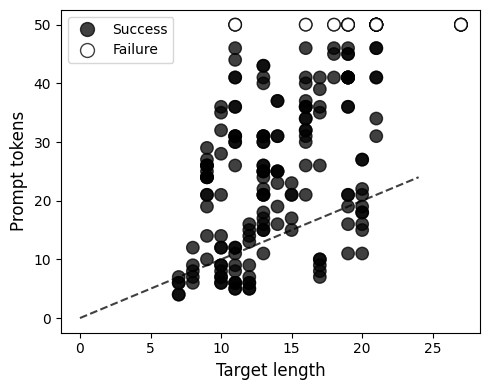

In [14]:
# Scatter plot of target length vs number of free tokens
fig, axes = plt.subplots(1, 1, figsize=(5, 4))

axes.plot(np.arange(25), np.arange(25), color="black", linestyle="--", alpha=0.75)
# axes.plot(np.arange(25), [y * 2 for y in np.arange(25)], color="black", linestyle="--", alpha=0.75)

axes.scatter(df["target_length"], df["num_free_tokens"], c=df["success"],cmap="binary", edgecolors='black', s=80, alpha=0.75)
axes.set_xlabel("Target length", fontsize=12)
axes.set_ylabel("Prompt tokens", fontsize=12)

# manually add legend elements
legend_elements = [
    mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markeredgecolor='black', markersize=10, alpha=0.75, label='Success'),
    mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markeredgecolor='black', markersize=10, alpha=0.75, label='Failure')]
axes.legend(handles=legend_elements, loc="upper left")

plt.tight_layout()

plt.show();

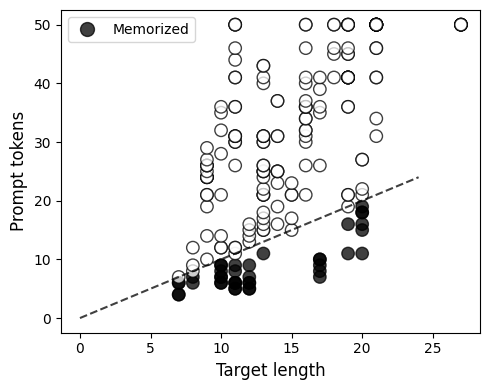

In [15]:
# Scatter plot of target length vs number of free tokens
fig, axes = plt.subplots(1, 1, figsize=(5, 4))

axes.plot(np.arange(25), np.arange(25), color="black", linestyle="--", alpha=0.75)
# axes.plot(np.arange(25), [y * 2 for y in np.arange(25)], color="black", linestyle="--", alpha=0.75)

axes.scatter(df["target_length"], df["num_free_tokens"], c=df["memorized"],cmap="binary", edgecolors='black', s=80, alpha=0.75)
axes.set_xlabel("Target length", fontsize=12)
axes.set_ylabel("Prompt tokens", fontsize=12)

# manually add legend elements
legend_elements = [
    mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markeredgecolor='black', markersize=10, alpha=0.75, label='Memorized'),
    # mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markeredgecolor='black', markersize=10, alpha=0.75, label='Failure')
    ]
axes.legend(handles=legend_elements, loc="upper left")

plt.tight_layout()

plt.show();

In [16]:
len(df[df["memorized"]]) / len(df)

0.19801980198019803

In [17]:
# # Filter the rows where dataset is 'random', the model is 'EleutherAI/pythia-14m', and success is True
# filtered_df = df[(df['cfg_dataset'] == 'famous_quotes') &
#                  (df['cfg_model_name'] == 'EleutherAI/pythia-14m')
#                  ]
# filtered_df.head().round(2)

In [18]:
# # Sort and dedup
# df_sorted = df.sort_values(by=['cfg_model_name', 'cfg_discrete_optimizer', 'cfg_dataset', 'cfg_data_idx', 'success'], ascending=[True, True, True, True, False])
# df = df_sorted.drop_duplicates(subset=['cfg_dataset', 'cfg_data_idx', 'cfg_model_name', 'cfg_discrete_optimizer'], keep='first')
# df = df[df["success"] == True]

# # Make summary counting the average ratio and success rate for each dataset and discrete_optimizer include counts
# summary = df.groupby(["cfg_model_name", "cfg_dataset", "cfg_discrete_optimizer"]).agg(
#     {"ratio": "mean", "memorized": "mean", "success": "count"}).round(2)
# summary

----

In [35]:
# Analze logits

file_path = "../outputs/EleutherAI_pythia-410m/generate_distributions.npy"
distributions = np.load(file_path) 
print(distributions.shape)

file_path = "../outputs/EleutherAI_pythia-410m/generate_target_slices.npy"
target_slices = np.load(file_path) 
print(target_slices.shape)

(5, 256, 50304)
(5, 2)


In [36]:
# # DEBUGGING: make sure argmax decoding works
# k = 10

# tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-410m")

# for idx, dist in list(enumerate(distributions))[0:5]:
#     # print(target_slices)
#     target_logits = dist[target_slices[idx][0] - 1:target_slices[idx][1] - 1]
#     target_logits = torch.tensor(target_logits)
#     values, indices = torch.topk(target_logits, k, dim=1)

#     tokens = [tokenizer.convert_ids_to_tokens(ids) for ids in indices]
#     for idx, token in enumerate(tokens):
#         print(token)
#         print(values[idx])
#     print()

In [37]:
# fig, axes = plt.subplots(1, 1, figsize=(5, 4))

# for idx, dist in enumerate(distributions):
#     target_logits = dist[target_slices[idx][0]:target_slices[idx][1] + 1]
    
#     # plt.imshow(target_logits[:, 500:550], cmap='hot', interpolation='nearest')
#     axes.hist(target_logits[0, :], alpha=0.7, bins=50, edgecolor='black', linewidth=1.2)

# plt.show()
# plt.close();

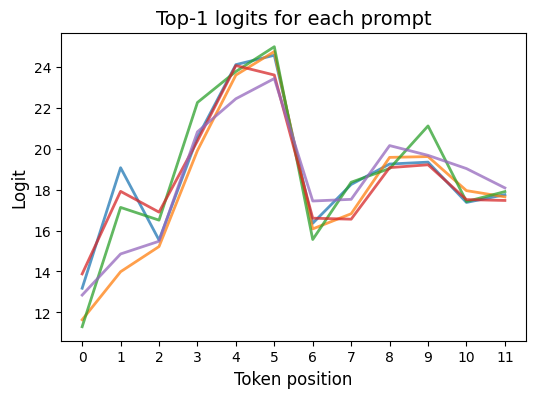

In [38]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4))

for idx, dist in enumerate(distributions):
    target_logits = dist[target_slices[idx][0] - 1:target_slices[idx][1] - 1]
    top_k = np.max(target_logits, axis=1)
    axes.plot(top_k, linewidth=2.0, alpha=0.75, label=f"Prompt {idx}")

axes.set_xlabel("Token position", fontsize=12)
axes.set_xticks(range(len(top_k)))
axes.set_ylabel("Logit", fontsize=12)

axes.set_title("Top-1 logits for each prompt", fontsize=14)
# axes.legend(loc="best", fontsize=12)

plt.show()
plt.close();

In [39]:
def plot_logits_at_n(n=1, k=10):
    fig, axes = plt.subplots(1, 1, figsize=(6, 4))

    for idx, dist in enumerate(distributions):
        target_logits = dist[target_slices[idx][0] - 1:target_slices[idx][1] - 1]
        target_logits = torch.tensor(target_logits)
        values, indices = torch.topk(target_logits, k, dim=1)
        axes.plot(values[:, n - 1], linewidth=2.0, alpha=0.75, label=f"Prompt {idx}")

    axes.set_xlabel("Token position", fontsize=12)
    axes.set_xticks(range(len(top_k)))
    axes.set_ylabel("Logit", fontsize=12)

    axes.set_title(f"Top-{n} logits for each prompt", fontsize=14)

    return fig, axes

In [40]:
# for n in range(1, 5):
#     plot_logits_at_n(n, k=10)

In [41]:
# Create data for logit heatmap
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-410m")


def get_top_k_logits_for_prompt(distribution, target_slice, k=10):
    target_logits = distribution[target_slice[0] - 1:target_slice[1] - 1]
    target_logits = torch.tensor(target_logits)
    values, indices = torch.topk(target_logits, k, dim=1)
    return values.T, indices.T

In [47]:
def plot_heatmap(values, indices, tokenizer, idx, show_values=False, show_tokens=False):
    fig, axes = plt.subplots(figsize=(5, 5))

    im = axes.imshow(values, cmap='viridis_r', vmin=7, vmax=30)

    # Show all ticks and label them with the respective list entries
    axes.set_xticks(np.arange(values.shape[1]), minor=False)
    axes.set_yticks(np.arange(values.shape[0]), minor=False)

    axes.set_xlabel("Token position", fontsize=12)
    axes.set_ylabel("Top-k logits", fontsize=12)

    # Loop over data dimensions and create text annotations.
    if show_values:
        texts = values
    if show_tokens:
        texts = indices
    for i in range(texts.shape[0]):
        for j in range(texts.shape[1]):
            if show_values:
                axes.text(j, i, f"{texts[i, j]:.2f}", ha="center", va="center", color="black", fontsize=8)
            if show_tokens:
                token = tokenizer._convert_id_to_token(indices[i, j])
                axes.text(j, i, token, ha="center", va="center", color="black", fontsize=8)

    return fig, axes

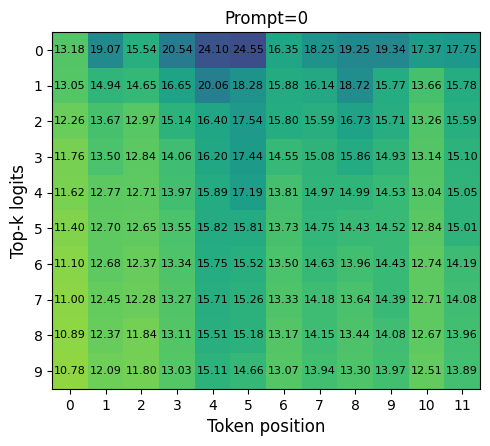

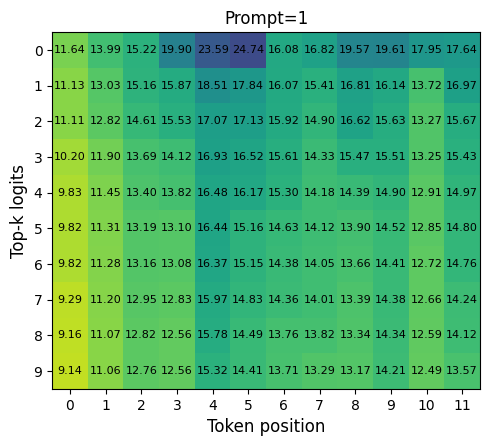

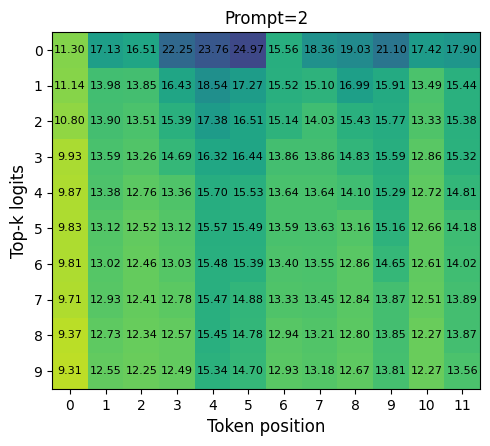

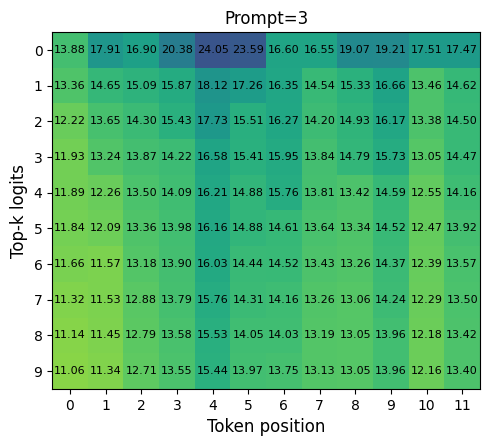

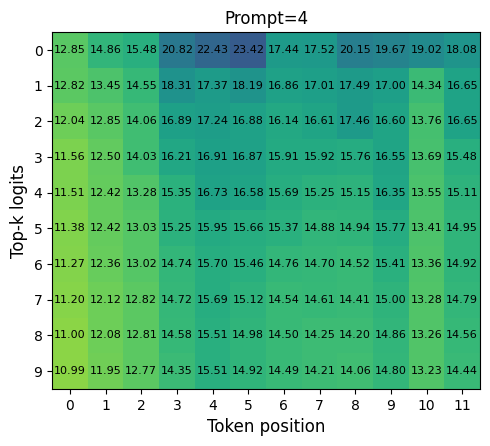

In [43]:
for pidx in range(5):
    values, indices = get_top_k_logits_for_prompt(distributions[pidx], target_slices[pidx], k=10)
    plot_heatmap(values, indices, tokenizer, pidx, show_values=True)
    # plot_heatmap(values, indices, tokenizer, pidx, show_tokens=True)


In [28]:
# TODO(mm): Add baseline when decoding from natural prompt of the same length

In [44]:
# Let's look at logits when decoding only the target sequence
file_path = "../outputs/EleutherAI_pythia-410m/generate_target_distributions.npy"
distributions = np.load(file_path) 
print(distributions.shape)

file_path = "../outputs/EleutherAI_pythia-410m/generate_target_target_slices.npy"
target_slices = np.load(file_path) 
print(target_slices.shape)

(5, 256, 50304)
(5, 2)


[ 1 12]


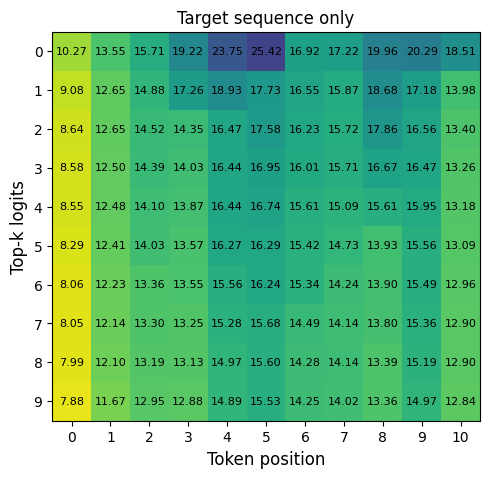

In [51]:
for pidx in range(1):
    print(target_slices[pidx])
    values, indices = get_top_k_logits_for_prompt(distributions[pidx], target_slices[pidx], k=10)
    fig, axes = plot_heatmap(values, indices, tokenizer, pidx, show_values=True)
    # plot_heatmap(values, indices, tokenizer, pidx, show_tokens=True)

    axes.set_title(f"Target sequence only", fontsize=12)
    fig.tight_layout()
    plt.show()


In [31]:
# Let's look at logits for normal sequences
file_path = "../outputs/EleutherAI_pythia-410m/generate_dummy_distributions.npy"
distributions = np.load(file_path) 
print(distributions.shape)


(2, 20, 50304)


In [32]:
# # Let's check generations
# k = 10
# tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-410m")

# for idx, target_logits in list(enumerate(distributions)):
#     target_logits = torch.tensor(target_logits)
#     values, indices = torch.topk(target_logits, k, dim=1)

#     tokens = [tokenizer.convert_ids_to_tokens(ids) for ids in indices]
#     for idx, token in enumerate(tokens):
#         print(token)
#         print(values[idx])
#     print()

In [33]:
for pidx in range(2):
    values = get_top_k_logits_for_prompt(distributions[pidx], [1, 12], k=10)
    plot_heatmap(values, pidx)

TypeError: plot_heatmap() missing 2 required positional arguments: 'tokenizer' and 'idx'